In [1]:
import pandas as pd
from datetime import datetime
import requests
import numpy_financial as npf
import numpy as np
import math
import matplotlib.pyplot as plt
import json

In [2]:
data = pd.read_csv("./ОФЗ Анализ - Погашение после 2014 года.csv")
display(data)

,Название,Начало Торгов,Погашение,Купон,Периодичность,ISIN
0,25075,13.02.2012,15.07.2015,"6,88",2,SU25075RMFS1
1,25077,13.02.2012,20.01.2016,7.35,2,SU25077RMFS7
2,25079,13.02.2012,03.06.2015,7,2,SU25079RMFS3
3,25080,25.04.2012,19.04.2017,7.4,2,SU25080RMFS3
4,25081,06.02.2013,31.01.2018,6.2,2,SU25081RMFS4
5,25082,19.06.2013,11.05.2016,6,2,SU25082RMFS4
6,25083,18.10.2017,15.12.2021,7,2,SU25083RMFS5
7,25084,19.02.2020,04.10.2023,5.3,2,SU25084RMFS5
8,25085,22.09.2021,24.09.2025,6.4,2,SU25085RMFS6
9,26202,13.02.2012,17.12.2014,11.2,4,SU26202RMFS0


In [3]:
def numberOfDays(date1, date2, format="%d.%m.%Y"):
  return float((datetime.strptime(date1, format) - datetime.strptime(date2, format)).days)

In [4]:
def getTradeData(date, isin, format="%d.%m.%Y"):
    dat = datetime.strptime(date, format)
    moexDate = datetime.strftime(dat, "%Y-%m-%d")
    url = "https://iss.moex.com/iss/history/engines/stock/markets/bonds/boards/tqob/securities/" + isin + ".csv?from=" + moexDate
    res = requests.get(url)
    data = res.text
    df = pd.DataFrame([x.split(';') for x in data.split('\n')])
    df = df.iloc[2:] # Dropping the empty rows
    # Making first row its column names
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    # Removing null values
    df["NUMTRADES"] = pd.to_numeric(df['NUMTRADES'])
    df = df[df["NUMTRADES"] > 0]
    # Convert to date
    df["TRADEDATE"] = pd.to_datetime(df["TRADEDATE"])
    return df.iloc[0]


In [5]:
def getEffectiveYieldForRow(row, date, format="%d.%m.%Y"):
  try:
    secid = row["ISIN"]
    price = str(row["Open"])
    sell_date = datetime.strftime(row.end, "%Y-%m-%d")
    trade_date = datetime.strftime(date, "%Y-%m-%d")
    yield_url = "https://iss.moex.com/iss/apps/bondization/yieldscalculator?accint_source=t0&calc_method=by_price_to_offer&calc_value="+ price + "&secid=" + secid + "&sell_date=" + sell_date + "&sell_value=100&tradedate=" + trade_date
    res = requests.get(yield_url)
    result = json.loads(res.text)
    effectiveYield = result["calculated"]["EFFECTIVEYIELD"]
    return effectiveYield
  except:
    return None

In [6]:
def getPriceForRow(row, date, format="%d.%m.%Y"):
  try:
    data = getTradeData(date, row["ISIN"], format)
    price = (float(data["OPEN"]) + float(data["HIGH"]) + float(data["LOW"]) + float(data["CLOSE"])) / 4
    return price
  except:
    return None

In [29]:
"""
def ytm(price, coupon, current_date, maturity_date, nominal=1000, coupon_freq = 2, format="%d.%m.%Y"):
  days = numberOfDays(maturity_date, current_date, format)
  coupon_interval = 365 / coupon_freq
  coupons = math.floor(days / coupon_interval)
  coupon_value = nominal * coupon / coupon_freq / 100
  # last_coupon = (days - coupons * coupon_interval) / coupon_interval * coupon_value
  # rounded up to the whole coupon period
  irr = npf.irr([-price] + coupons * [coupon_value] + [coupon_value + nominal])
  ytm = (1 + irr)**coupon_freq -1
  return ytm
"""

'\ndef ytm(price, coupon, current_date, maturity_date, nominal=1000, coupon_freq = 2, format="%d.%m.%Y"):\n  days = numberOfDays(maturity_date, current_date, format)\n  coupon_interval = 365 / coupon_freq\n  coupons = math.floor(days / coupon_interval)\n  coupon_value = nominal * coupon / coupon_freq / 100\n  # last_coupon = (days - coupons * coupon_interval) / coupon_interval * coupon_value\n  # rounded up to the whole coupon period\n  irr = npf.irr([-price] + coupons * [coupon_value] + [coupon_value + nominal])\n  ytm = (1 + irr)**coupon_freq -1\n  return ytm\n'

In [7]:
# Adding date columns
data["start"] = data.apply(lambda row: datetime.strptime(row["Начало Торгов"], "%d.%m.%Y"), axis=1)
data["end"] = data.apply(lambda row: datetime.strptime(row["Погашение"], "%d.%m.%Y"), axis=1)

In [8]:
# Pick date
cur_date_str = "10.01.2024"
cur_date = datetime.strptime(cur_date_str, "%d.%m.%Y")
print(cur_date)
# Select papers
cur_data = data[(data["start"] < cur_date) & (data["end"] > cur_date)]
cur_data.reset_index(drop=True, inplace=True)
display(cur_data)

2024-01-10 00:00:00


,Название,Начало Торгов,Погашение,Купон,Периодичность,ISIN,start,end
0,25085,22.09.2021,24.09.2025,6.4,2,SU25085RMFS6,2021-09-22,2025-09-24
1,26207,22.02.2012,03.02.2027,8.15,2,SU26207RMFS9,2012-02-22,2027-02-03
2,26212,23.01.2013,19.01.2028,7.05,2,SU26212RMFS9,2013-01-23,2028-01-19
3,26218,17.02.2016,17.09.2031,8.5,2,SU26218RMFS6,2016-02-17,2031-09-17
4,26219,06.07.2016,16.09.2026,7.75,2,SU26219RMFS4,2016-07-06,2026-09-16
5,26221,15.03.2017,23.03.2033,7.7,2,SU26221RMFS0,2017-03-15,2033-03-23
6,26222,03.05.2017,16.10.2024,7.1,2,SU26222RMFS8,2017-05-03,2024-10-16
7,26223,28.02.2018,28.02.2024,6.5,2,SU26223RMFS6,2018-02-28,2024-02-28
8,26224,07.03.2018,23.05.2029,6.9,2,SU26224RMFS4,2018-03-07,2029-05-23
9,26225,28.02.2018,10.05.2034,7.25,2,SU26225RMFS1,2018-02-28,2034-05-10


In [9]:
# Calculate yield to maturity
cur_data["days_to_maturity"] = cur_data.apply(lambda row: (row["end"] - cur_date).days, axis=1)
# Convert column data types
cur_data["Купон"] = pd.to_numeric(cur_data["Купон"])
cur_data["Периодичность"] = pd.to_numeric(cur_data["Периодичность"])


C:\Users\igor\AppData\Local\Temp\ipykernel_13072\3224452307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_data["days_to_maturity"] = cur_data.apply(lambda row: (row["end"] - cur_date).days, axis=1)
C:\Users\igor\AppData\Local\Temp\ipykernel_13072\3224452307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_data["Купон"] = pd.to_numeric(cur_data["Купон"])
C:\Users\igor\AppData\Local\Temp\ipykernel_13072\3224452307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [10]:
sorted_result = cur_data.sort_values("days_to_maturity")
#sorted_result["years_to_maturity"] = sorted_result["days_to_maturity"] / 365
sorted_result = sorted_result[sorted_result["days_to_maturity"] >= 365/2]
display(sorted_result)

,Название,Начало Торгов,Погашение,Купон,Периодичность,ISIN,start,end,days_to_maturity
11,26227,27.03.2019,17.07.2024,7.40,2,SU26227RMFS7,2019-03-27,2024-07-17,189
6,26222,03.05.2017,16.10.2024,7.10,2,SU26222RMFS8,2017-05-03,2024-10-16,280
18,26234,10.06.2020,16.07.2025,4.50,2,SU26234RMFS3,2020-06-10,2025-07-16,553
0,25085,22.09.2021,24.09.2025,6.40,2,SU25085RMFS6,2021-09-22,2025-09-24,623
13,26229,05.06.2019,12.11.2025,7.15,2,SU26229RMFS3,2019-06-05,2025-11-12,672
4,26219,06.07.2016,16.09.2026,7.75,2,SU26219RMFS4,2016-07-06,2026-09-16,980
10,26226,06.02.2019,07.10.2026,7.95,2,SU26226RMFS9,2019-02-06,2026-10-07,1001
1,26207,22.02.2012,03.02.2027,8.15,2,SU26207RMFS9,2012-02-22,2027-02-03,1120
16,26232,11.12.2019,06.10.2027,6.00,2,SU26232RMFS7,2019-12-11,2027-10-06,1365
2,26212,23.01.2013,19.01.2028,7.05,2,SU26212RMFS9,2013-01-23,2028-01-19,1470


In [11]:
plt.scatter(sorted_result["years_to_maturity"], sorted_result["moex_ytm"])
plt.show()

KeyError: 'years_to_maturity'

In [620]:
sorted_result["lnd"] = sorted_result.apply(lambda row: math.log(row["years_to_maturity"]), axis = 1)
sorted_result["ln_ytm"] = sorted_result.apply(lambda row: math.log(row["moex_ytm"]), axis = 1)
sorted_result["ln_ytm"] = np.log(sorted_result["moex_ytm"])

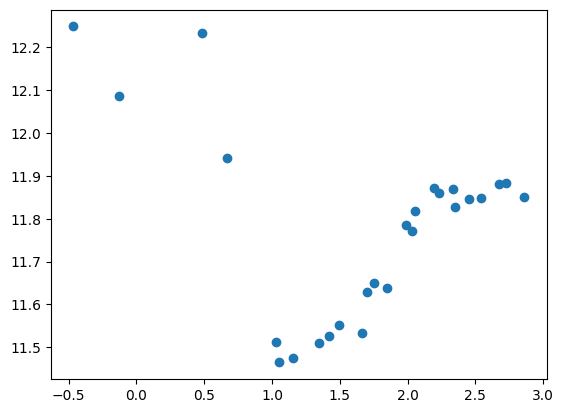

In [621]:
plt.scatter(sorted_result["lnd"], sorted_result["moex_ytm"])
plt.show()

In [622]:
"""
котировка + даты купонов + срок до погашения = доходность
ключевая ставка + инфляция + рост цен + срок до погашения = доходность  = котировка
дата + срок до погашения
"""
#16  8 12  1200  | 11.8
#16  8 12  400   | 12.5
#7.5 4 6   1400  | 8.2  - 01.10.2022 26240
#mape


'\nкотировка + даты купонов + срок до погашения = доходность\nключевая ставка + инфляция + рост цен + срок до погашения = доходность  = котировка\nдата + срок до погашения\n'